In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

# 0

In [8]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# A

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [96]:
df_describe = df.describe().drop('count')
df_describe

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# B

In [91]:
total_bill_df = df['total_bill'].describe().drop('count')
tip_df = df['tip'].describe().drop('count')
size_df = df['size'].describe().drop('count')

[Text(0.5, 1.0, 'size')]

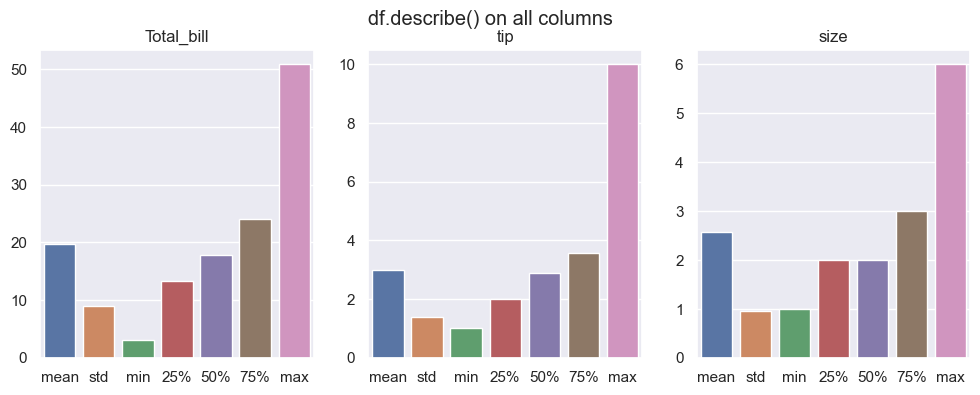

In [139]:
# subplots(1, 3) 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("df.describe() on all columns") # head title for all plots

# axes = plots position as a graph
sns.barplot(ax=axes[0], data=df, x=total_bill_df.index, y=total_bill_df.values).set(title="Total_bill")
sns.barplot(ax=axes[1], data=df,x=tip_df.index, y=tip_df.values).set(title="tip")
sns.barplot(ax=axes[2], data=df,x=size_df.index, y=size_df.values).set(title="size")

# C

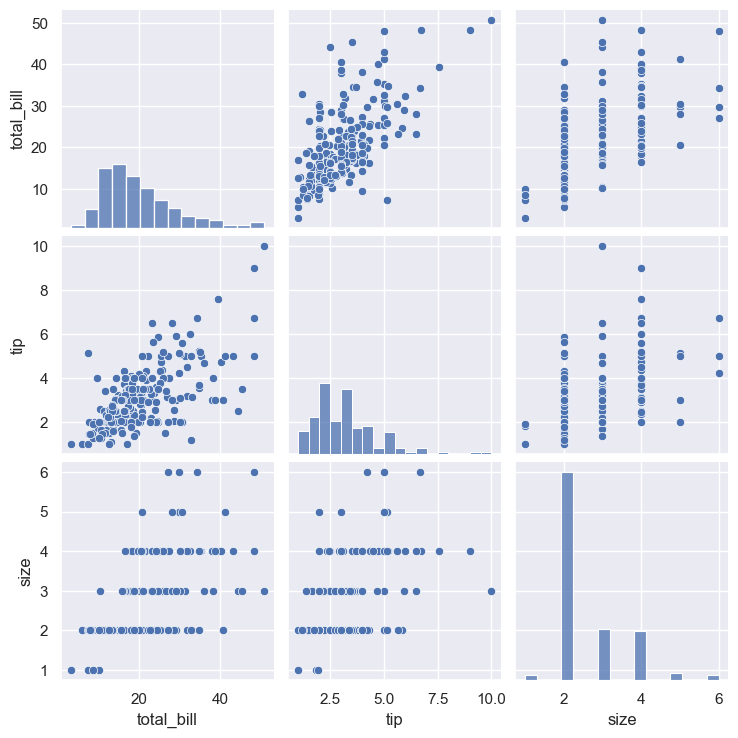

In [141]:
sns.pairplot(df)

<Axes: ylabel='sex'>

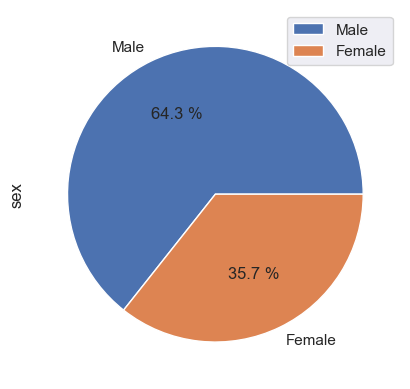

In [171]:
#plt.pie(x=df["sex"].value_counts(), autopct='%.1f %%', legend=True)

df["sex"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', legend=True)

In [172]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [176]:
df_female = df[df['sex']=="Female"]
df_male = df[df['sex']=="Male"]

[Text(0.5, 1.0, 'Male')]

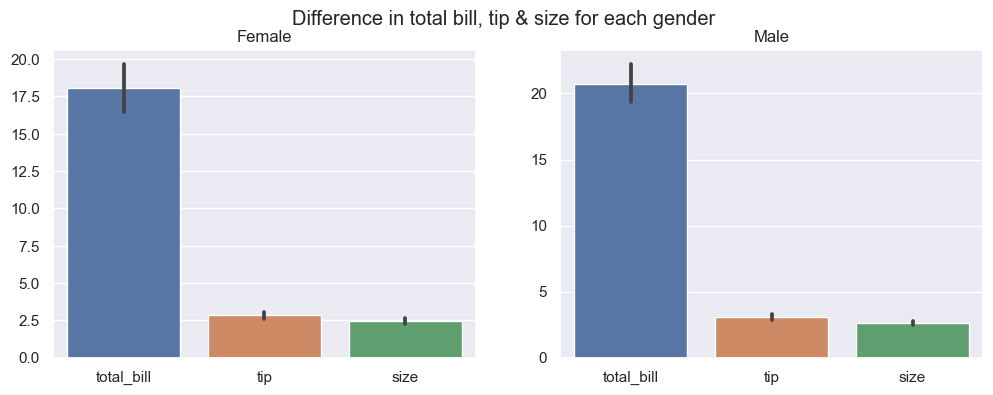

In [185]:
# subplots(1, 3) 1 row, 3 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Difference in total bill, tip & size for each gender") # head title for all plots

# axes = plots position as a graph
sns.barplot(ax=axes[0], data=df_female).set(title="Female")
sns.barplot(ax=axes[1], data=df_male).set(title="Male")